In [21]:
import numpy as np
import matlab.engine
import os
import signal
import time
import scipy.io as sio
import time
import subprocess
import matplotlib.pyplot as plt

In [22]:
forward_tx_gain = 5
forward_rx_gain = 10

In [23]:

string1 = 'python3 TX_Feedback.py -tx_gain ' + str(forward_tx_gain)
string2 = 'python3 RX_Feedback.py -rx_gain ' + str(forward_rx_gain)

In [24]:
# Message generation
subprocess.call(string1 + ' -dev_type encoder_channel', shell= True)

TX Noise generated
TX Transmission starts


0

In [25]:
# Receiver receives first message
subprocess.call(string2 + ' -dev_type decoder_channel -n_captures 30', shell= True)

# Transmitter process kill
subprocess.call('python3 flowgraph_process_kill.py', shell= True)

RX Reception 31 starts
Capture : 1 ...
Capture done
Capture : 2 ...
Capture done
Capture : 3 ...
Capture done
Capture : 4 ...
Capture done
Capture : 5 ...
Capture done
Capture : 6 ...
Capture done
Capture : 7 ...
Capture done
Capture : 8 ...
Capture done
Capture : 9 ...
Capture done
Capture : 10 ...
Capture done
Capture : 11 ...
Capture done
Capture : 12 ...
Capture done
Capture : 13 ...
Capture done
Capture : 14 ...
Capture done
Capture : 15 ...
Capture done
Capture : 16 ...
Capture done
Capture : 17 ...
Capture done
Capture : 18 ...
Capture done
Capture : 19 ...
Capture done
Capture : 20 ...
Capture done
Capture : 21 ...
Capture done
Capture : 22 ...
Capture done
Capture : 23 ...
Capture done
Capture : 24 ...
Capture done
Capture : 25 ...
Capture done
Capture : 26 ...
Capture done
Capture : 27 ...
Capture done
Capture : 28 ...
Capture done
Capture : 29 ...
Capture done
Capture : 30 ...
Capture done

Process Successfully terminated


0

In [26]:
subprocess.call('python3 flowgraph_process_kill.py', shell= True)


Process Successfully terminated


0

0.012277573124321072
9.831405275004152e-06


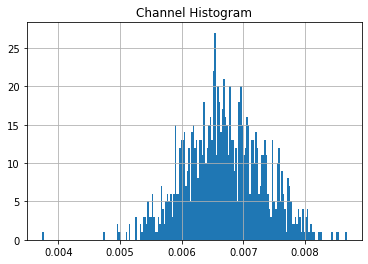

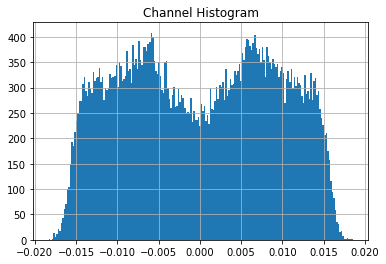

In [27]:
Channel_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Channel_Files/Channel_Output.mat')
Channel_OutputM = np.abs(Channel_Output['Channel'])
Channel_OutputP = np.imag(Channel_Output['Channel'])

print(np.mean(Channel_OutputM))
print(np.var(Channel_OutputM))

plt.figure()
plt.hist(Channel_OutputM[1::52], 200)
plt.title('Channel Histogram')
plt.grid(True)
plt.savefig('Figures/channelM.png')
plt.show()

plt.figure()
plt.hist(Channel_OutputP, 200)
plt.title('Channel Histogram')
plt.grid(True)
plt.savefig('Figures/channelP.png')
plt.show()
